# Homework-2
Homework-2: Build your own RNN-based models including attention/transformer related mechanisms for Sentiment Analysis using the IMDb reviews dataset and try to achieve the highest possible accuracy. Discuss your findings.

Ref. Sentiment Analysis on IMDb https://paperswithcode.com/sota/sentiment-analysis-on-imdb

透過是正評還是負評去決定他的accuracy


## 查看gpu的狀況

In [1]:
!nvidia-smi

Tue Apr 25 07:12:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 導入需要的函式庫

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
maxlen = 380

# imdb資料下載


In [3]:
from tensorflow.keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocab_size)

# 設定 train_data 和 test_data 並做預處理

In [4]:
X_train = pad_sequences(X_train, maxlen = maxlen)
X_test = pad_sequences(X_test, maxlen = maxlen)

In [5]:
X_train.shape

(25000, 380)

In [6]:
y_train.shape

(25000,)

In [7]:
#print(X_train[2])

# 設定RNN-based-model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding, Dropout, SimpleRNN, TimeDistributed, GRU, TimeDistributed

model = Sequential()
model.add(Embedding(10000, 128, input_shape = (X_train.shape[1],)))
# model.add(LSTM(units=60, activation='tanh'))
# model.add(Dropout(0.25))

#return_sequences=True
#model.add(SimpleRNN(units=30,return_sequences=True))
#model.add(SimpleRNN(units=30,return_sequences=True))

# model.add(SimpleRNN(units=30))
# model.add(Dropout(0.25))

# model.add(LSTM(units=60, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
# model.add(LSTM(units=60, dropout=0.2, recurrent_dropout=0.2))
# model.add(TimeDistributed(Dense(units=1)))
model.add(GRU(units=30))

model.add(Dense(units=1, activation='sigmoid'))

print(model.summary())
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 380, 128)          1280000   
                                                                 
 gru (GRU)                   (None, 30)                14400     
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 1,294,431
Trainable params: 1,294,431
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
history = model.fit( X_train, 
            y_train,
            epochs=15,
            batch_size=128,
            validation_data=(X_test, y_test))

Epoch 1/15
196/196 [==============================] - 47s 202ms/step - loss: 0.4627 - accuracy: 0.7664 - val_loss: 0.3348 - val_accuracy: 0.8570
Epoch 2/15
196/196 [==============================] - 26s 132ms/step - loss: 0.2431 - accuracy: 0.9048 - val_loss: 0.3134 - val_accuracy: 0.8714
Epoch 3/15
196/196 [==============================] - 19s 99ms/step - loss: 0.1763 - accuracy: 0.9347 - val_loss: 0.3440 - val_accuracy: 0.8680
Epoch 4/15
196/196 [==============================] - 15s 74ms/step - loss: 0.1341 - accuracy: 0.9536 - val_loss: 0.3615 - val_accuracy: 0.8701
Epoch 5/15
196/196 [==============================] - 12s 61ms/step - loss: 0.1066 - accuracy: 0.9636 - val_loss: 0.3882 - val_accuracy: 0.8646
Epoch 6/15
196/196 [==============================] - 11s 57ms/step - loss: 0.0756 - accuracy: 0.9753 - val_loss: 0.4382 - val_accuracy: 0.8639
Epoch 7/15
196/196 [==============================] - 8s 42ms/step - loss: 0.0533 - accuracy: 0.9842 - val_loss: 0.4854 - val_accuracy

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

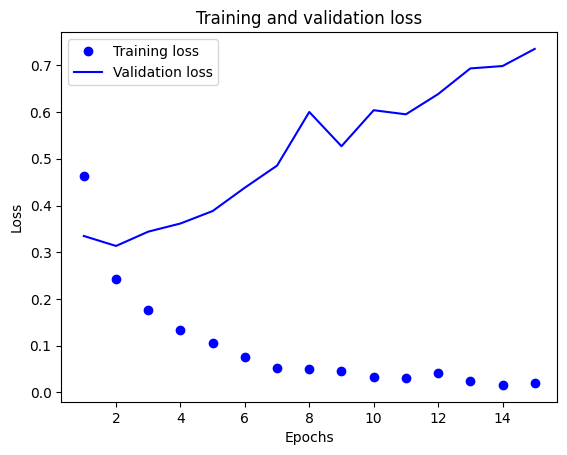

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

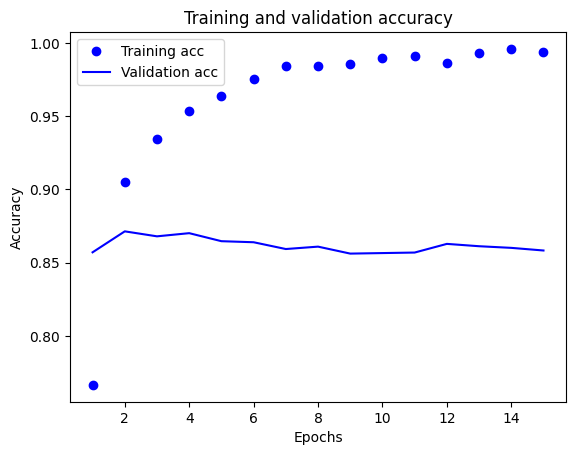

In [12]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()